# __Clustering Techniques for Time Series Data Analysis.__
Notebook with a simple review of clustering techniques for the time series analysis of ocean current data distributed into 192 geo-referenced nodes. 

In [50]:
# Installing the required libraries
import pandas as pd

### __1. Importing the requiered Data.__

In [51]:
# Relative paths to the files with the data
PATH_time_series = "resources\Time_Series_Velocity_Data_per_Node.csv"
PATH_statistic_features = "resources\Time_Series_Statistical_Features_per_Node.csv"

#### __1.1 Simple Feature Clustering Approach__.

In [52]:
# Load the time series pre-computed features data. 
time_series_features = pd.read_csv(PATH_statistic_features, header=0)
print("The shape of the time series data is: ", time_series_features.shape)

# Select the features considered for the clustering.
# For this first approach, only the first five raw statistical moments are considered.
features_kmean = ["Second_Raw_Moment", "Third_Raw_Moment", "Fourth_Raw_Moment", "Fifth_Raw_Moment"]
X_kmean = time_series_features[features_kmean].values
print("The shape of the data for clustering is: ", X_kmean.shape)

The shape of the time series data is:  (192, 36)
The shape of the data for clustering is:  (192, 4)


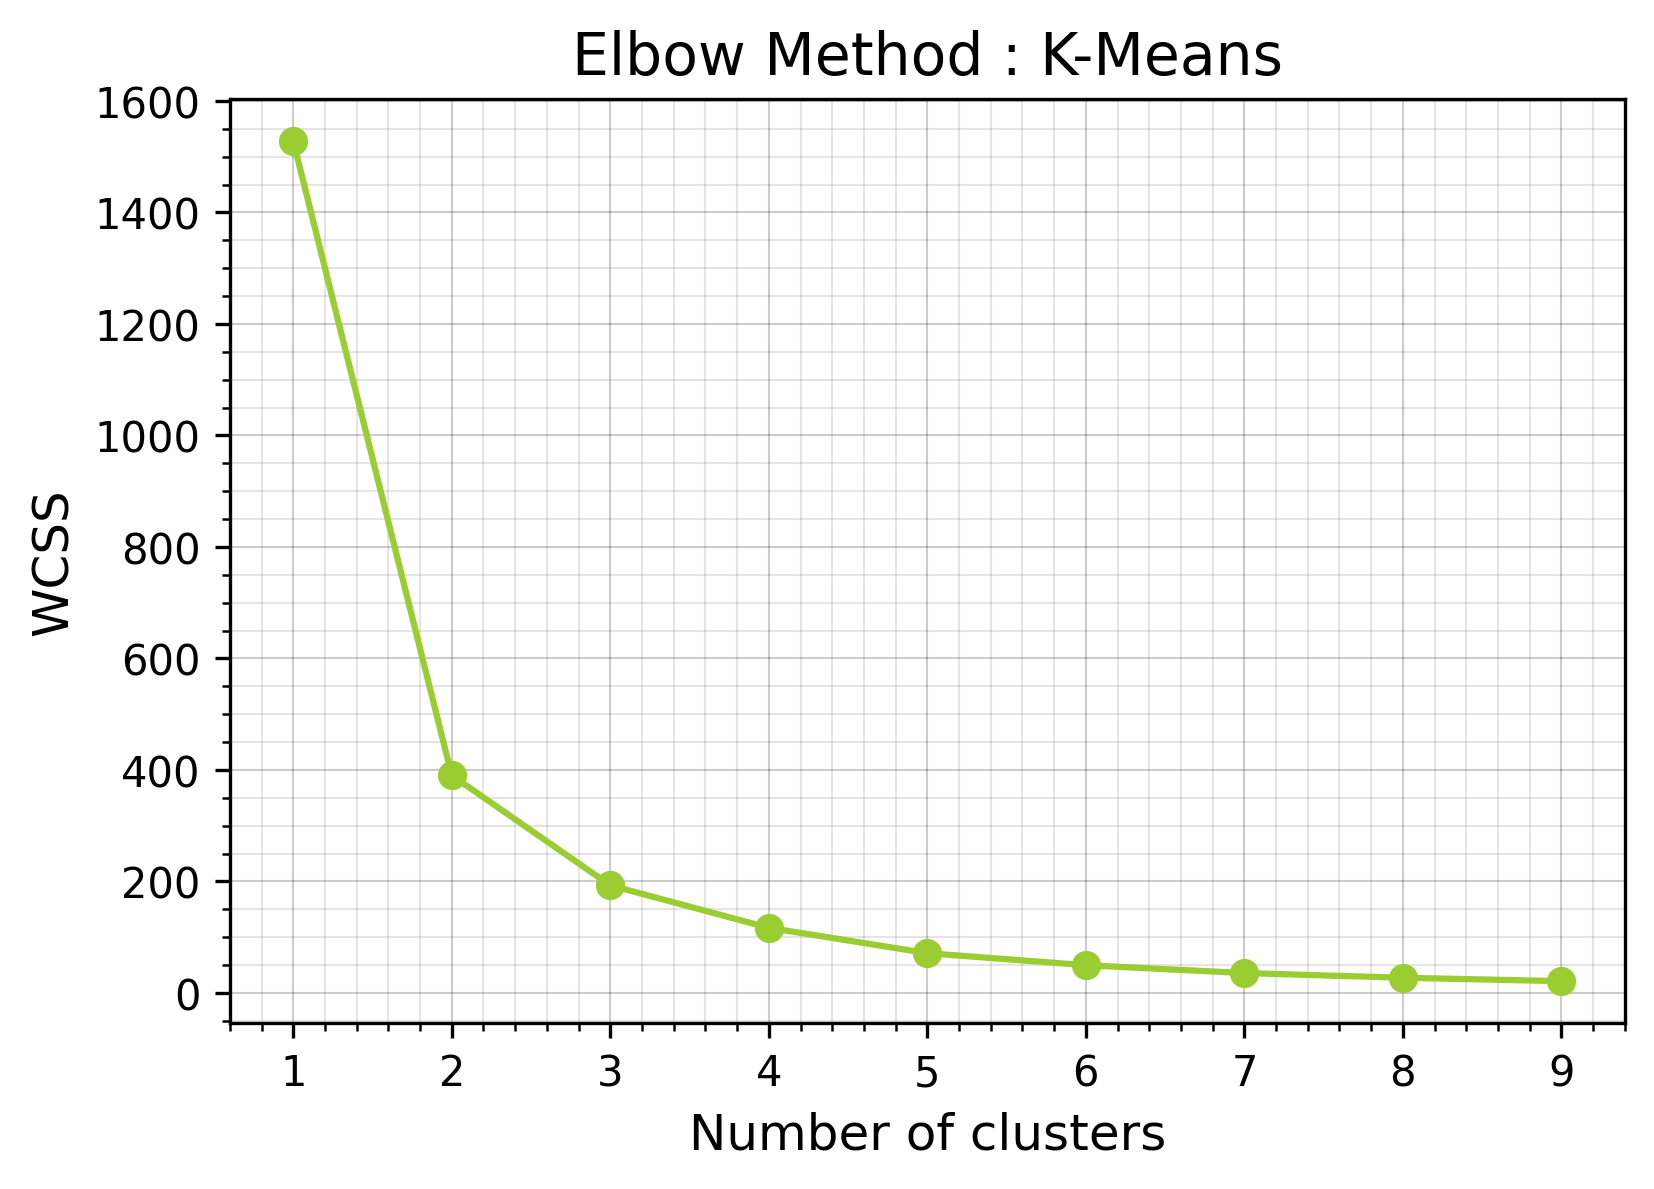

In [53]:
# Verify the optimum number of clusters using the Elbow method.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the range of clusters to be tested.
n_clusters = range(1, 10)
wcss = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto')
    kmeans.fit(X_kmean)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph.
fig = plt.figure(figsize=(6, 4), dpi=300)
plt.plot(n_clusters, wcss, 'o-', color = "YellowGreen")
plt.title('Elbow Method : K-Means', fontsize=14)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.minorticks_on() 
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black', alpha=0.20)
plt.grid(which='minor', linestyle='-', linewidth='0.5', color='black', alpha=0.10)
plt.savefig("Elbow_Method_KMeans.png", bbox_inches='tight')